In [1]:
import estimators
import utils

import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.rcParams.update(utils.get_plt_settings())

save=True


# Pino

- Schwellwerte

### 10 Sekunden, 1 Sekunde Schrittweite

                 precision    recall  f1-score   support

non-informative       0.45      0.03      0.05    411612
    informative       0.52      0.97      0.68    445516

       accuracy                           0.52    857128
      macro avg       0.48      0.50      0.36    857128
   weighted avg       0.48      0.52      0.38    857128

MAE auf als informativ klassifizierten Segmenten: 20.92
MAE auf als informativ annotierten Segmenten:  20.78
MSE auf als informativ klassifizierten Segmenten: 1351.00
MAE auf als informativ annotierten Segmenten:  1334.28


Coverage klassifiziert      : 96.43 %
Coverage annotiert          : 43.22 %

 Coverage bestimmter Fehler des genutzten Signals auf Gesamtsignal
Fehler < 5 gesamt           : 33.60 %
Fehler < 5 klassifiziert    : 32.36 %
Fehler < 10 gesamt          : 44.74 %
Fehler < 10 klassifiziert   : 42.99 %
Fehler < 15 gesamt          : 53.94 %
Fehler < 15 klassifiziert   : 51.82 %
Fehler < 20 gesamt          : 61.86 %
Fehler < 20 klassifiz

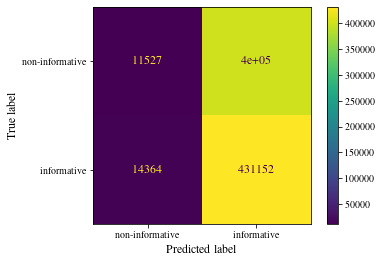

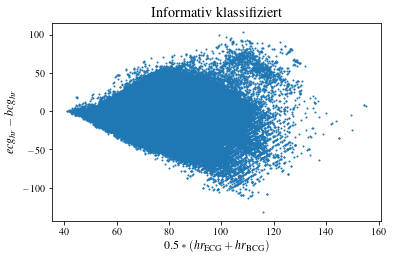

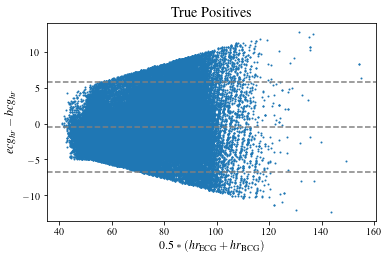

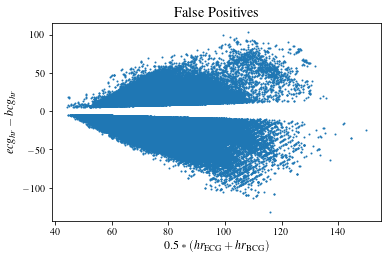

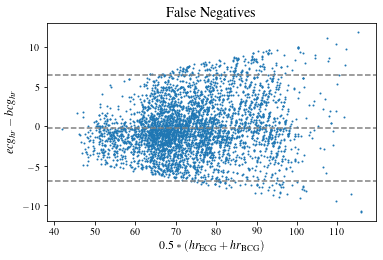

In [2]:
pino = estimators.PinoMinMaxStd()
predicted = pino.predict_all_labels()
labels = pino.target
y_pred, y_true = pino.predict_test_set()
class_names = ['non-informative', 'informative']
coverage = len(predicted[predicted])/len(predicted.index)*100
coverage_annotated = len(labels[labels])/len(labels.index)*100

ConfusionMatrixDisplay(confusion_matrix(labels, predicted), display_labels=class_names).plot()
print(classification_report(labels, predicted, target_names=class_names))
pino.print_model_test_report()

print("\n Alle Daten")
print("Fehler auf als informativ klassifizierten Segmenten: %.2f" % pino.get_mean_error(pino.target.index, predicted))
print("Fehler auf als informativ annotierten Segmenten:  %.2f" % pino.get_mean_error(pino.target.index))
print("Informative Segmente nach Pino: %.2f" % coverage)
print("Informative Segmente nach Annotation: %.2f" % coverage_annotated)

### 4 Sekunden, 1 Sekunde Schrittweite

                 precision    recall  f1-score   support

non-informative       0.56      0.02      0.03    466635
    informative       0.46      0.99      0.62    390477

       accuracy                           0.46    857112
      macro avg       0.51      0.50      0.33    857112
   weighted avg       0.51      0.46      0.30    857112

MAE auf als informativ klassifizierten Segmenten: 29.20
MAE auf als informativ annotierten Segmenten:  29.14
MSE auf als informativ klassifizierten Segmenten: 4613.57
MAE auf als informativ annotierten Segmenten:  4599.38


Coverage klassifiziert      : 98.23 %
Coverage annotiert          : 37.34 %

 Coverage bestimmter Fehler des genutzten Signals auf Gesamtsignal
Fehler < 5 gesamt           : 29.22 %
Fehler < 5 klassifiziert    : 28.78 %
Fehler < 10 gesamt          : 38.62 %
Fehler < 10 klassifiziert   : 37.97 %
Fehler < 15 gesamt          : 47.20 %
Fehler < 15 klassifiziert   : 46.36 %
Fehler < 20 gesamt          : 55.23 %
Fehler < 20 klassifiz

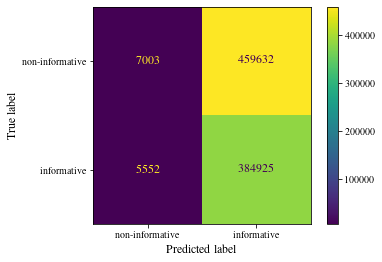

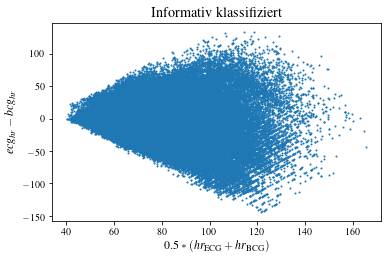

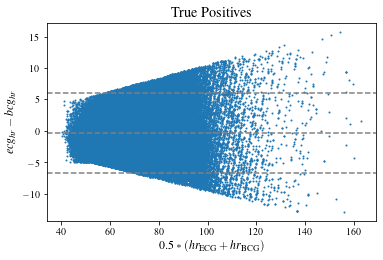

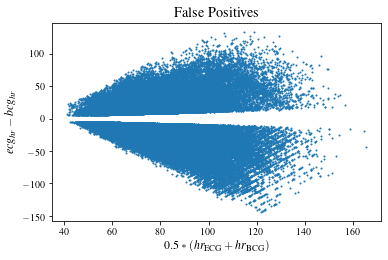

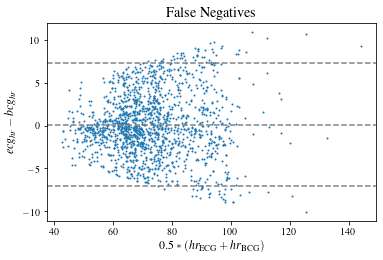

In [3]:
pino = estimators.PinoMinMaxStd(segment_length=4, overlap_amount=0.75)
predicted = pino.predict_all_labels()
labels = pino.target
y_pred, y_true = pino.predict_test_set()
class_names = ['non-informative', 'informative']
coverage = len(predicted[predicted])/len(predicted.index)*100
coverage_annotated = len(labels[labels])/len(labels.index)*100

ConfusionMatrixDisplay(confusion_matrix(labels, predicted), display_labels=class_names).plot()
print(classification_report(labels, predicted, target_names=class_names))
pino.print_model_test_report()

print("\n Alle Daten")
print("Fehler auf als informativ klassifizierten Segmenten: %.2f" % pino.get_mean_error(pino.target.index, predicted))
print("Fehler auf als informativ annotierten Segmenten:  %.2f" % pino.get_mean_error(pino.target.index))
print("Informative Segmente nach Pino: %.2f" % coverage)
print("Informative Segmente nach Annotation: %.2f" % coverage_annotated)